In [3]:
import numpy as np
import pywt
import scipy as sp
import scipy.fftpack
from scipy import signal, fft
import emd
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from tftb.generators import fmlin
from tftb.processing.cohen import WignerVilleDistribution
import scipy.io
%matplotlib inline
np.set_printoptions(precision=2)
plt.rcParams.update({'font.size': 18})

In [4]:
data = scipy.io.loadmat('Data/vanvikan/imu_measurements_1_2.mat')
imuData_acc = data['imuData'][0][0][0]
print(imuData_acc)

[[ 0.13 -0.05  0.23 ...  0.19  0.1  -0.01]
 [ 0.37  0.16  0.23 ...  0.22  0.22  0.08]
 [ 9.24  8.66  9.8  ... 10.54  9.95  9.24]]


In [5]:
signalx = imuData_acc[0]
signaly = imuData_acc[1]
signalz = imuData_acc[2] - 9.81

In [6]:
fs = 250
resample_rate = 0.4

dt = 1 / fs
N = len(signalx)
t = np.linspace(0,(N-1)*dt, N)

In [7]:
last_n_minutes = 1;
start_idx = last_n_minutes * 250 * 60
#[N-start_idx:N]
print(t[N-1])

971.7520000000001


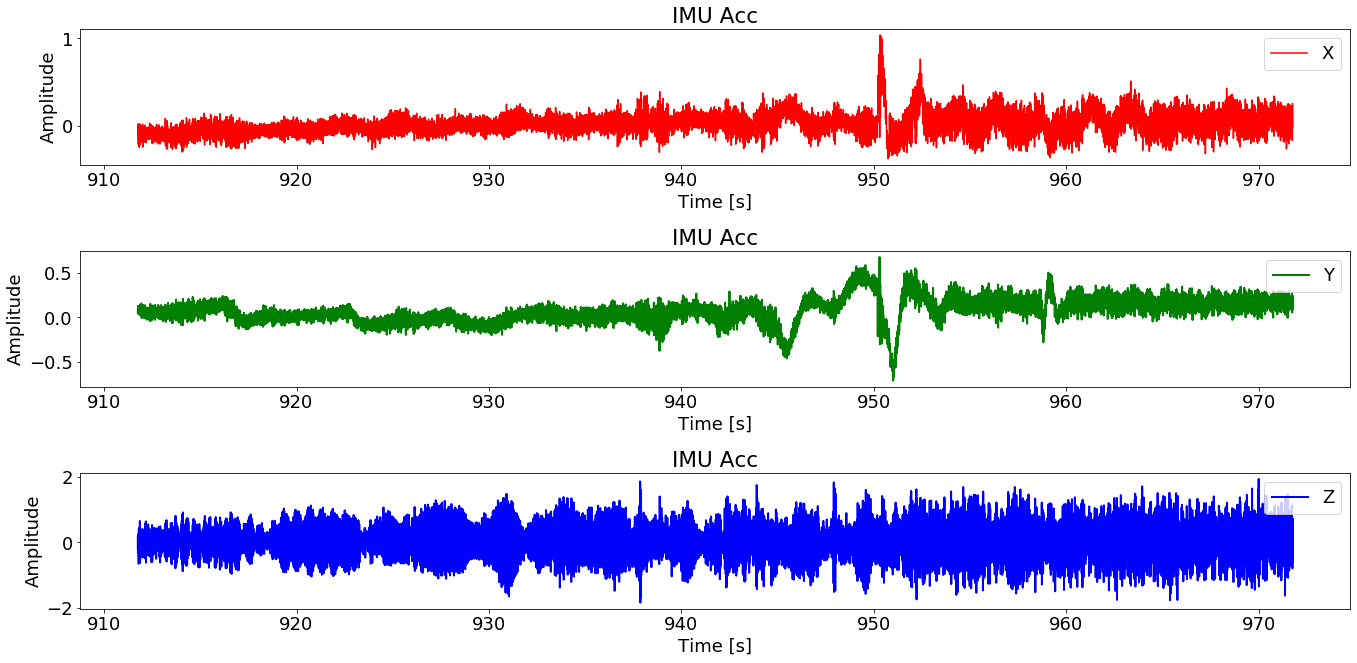

In [8]:
## Plots
fig,axs = plt.subplots(3,1,figsize=(20,10))
fig.tight_layout(pad=3.0)

plt.sca(axs[0])
plt.plot(t[N-start_idx:N],signalx[N-start_idx:N],color='r',linewidth=1.5,label='X')
plt.title('IMU Acc')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
#plt.grid()
plt.legend(loc='upper right')

plt.sca(axs[1])
plt.plot(t[N-start_idx:N],signaly[N-start_idx:N],color='g',linewidth=2,label='Y')
plt.title('IMU Acc')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
#plt.grid()
plt.legend(loc='upper right')

plt.sca(axs[2])
plt.plot(t[N-start_idx:N],signalz[N-start_idx:N],color='b',linewidth=2,label='Z')
plt.title('IMU Acc')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
#plt.grid()
plt.legend(loc='upper right')

plt.show()

Scale to frequency conversion: [100, 250] -> [0.62 0.25] Hz


D:\Anaconda\envs\DataAnalysis\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
D:\Anaconda\envs\DataAnalysis\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
<ipython-input-9-a41895858624>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

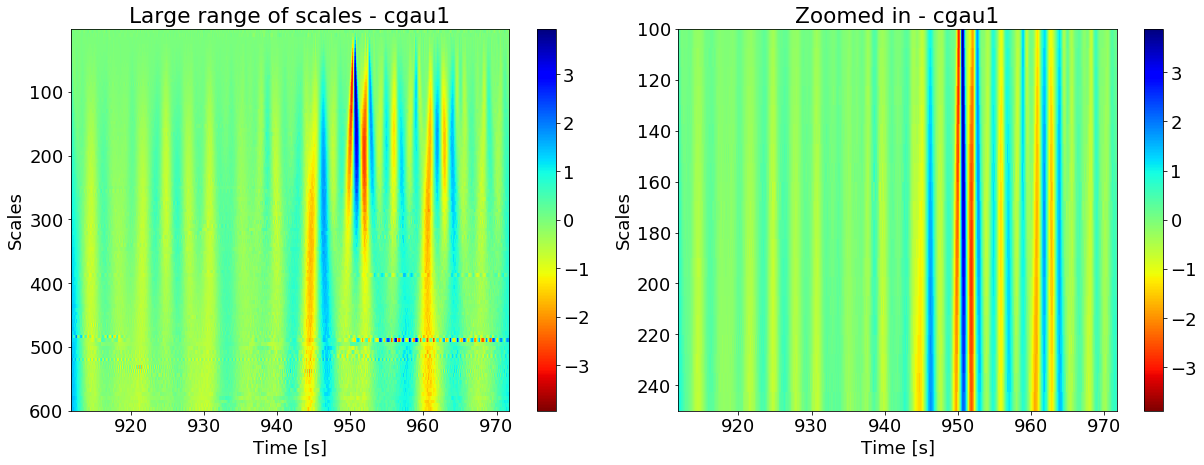

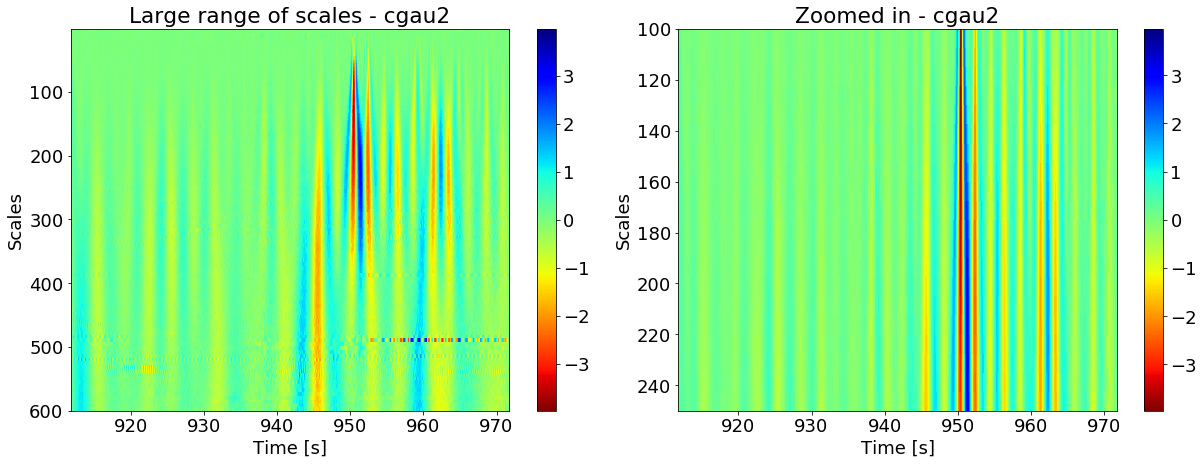

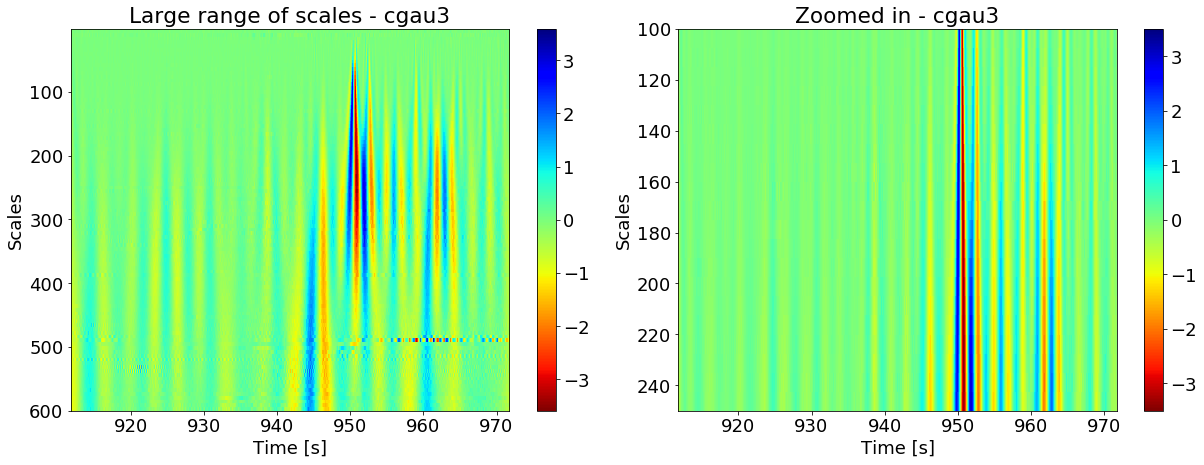

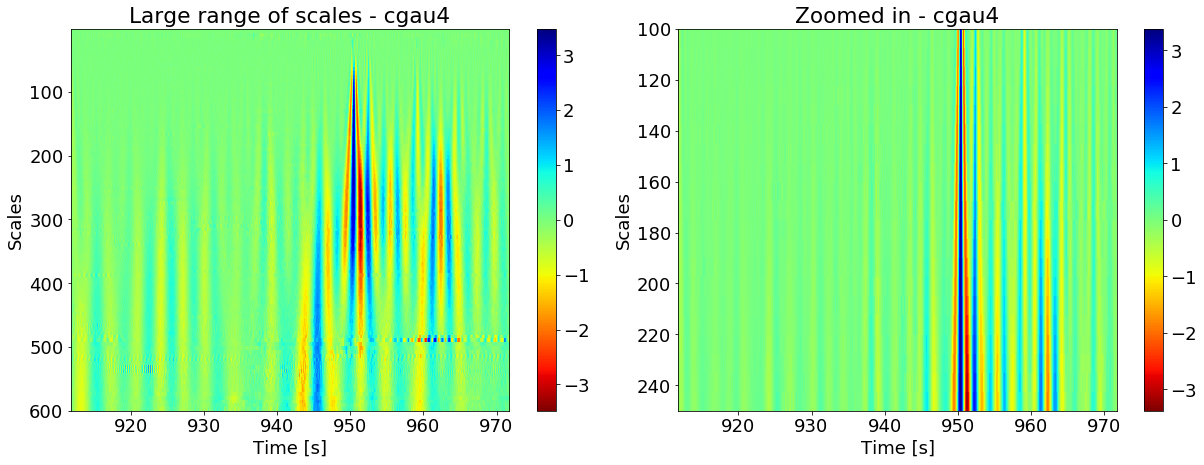

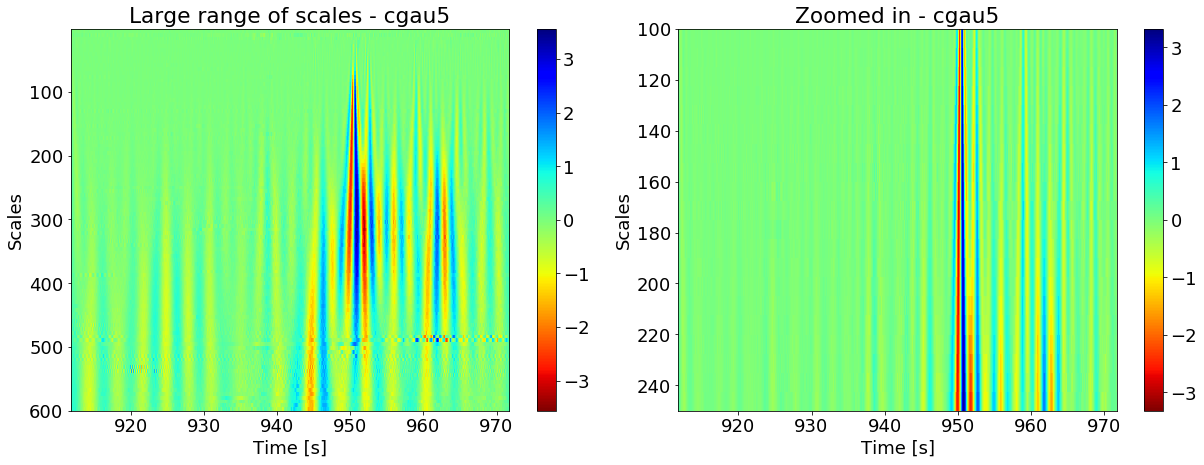

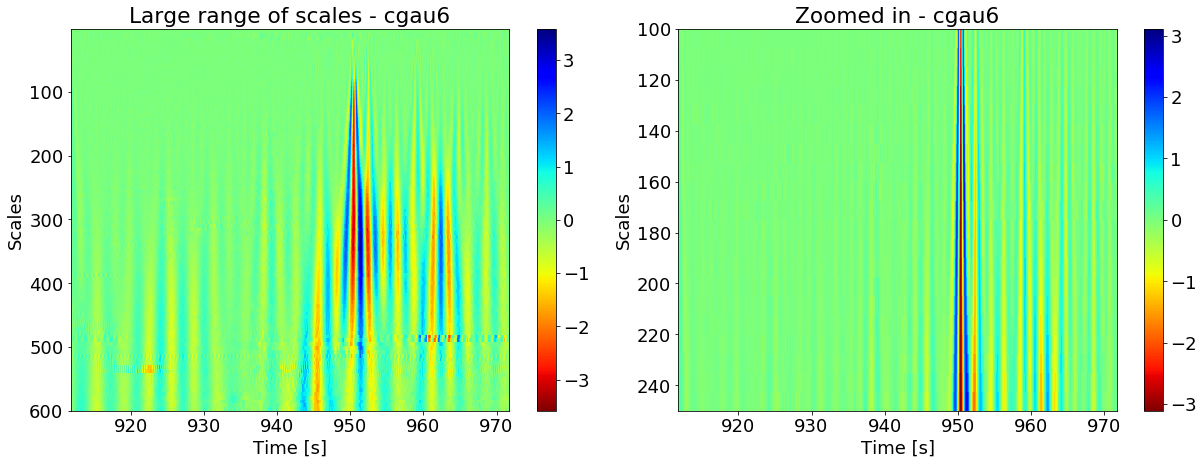

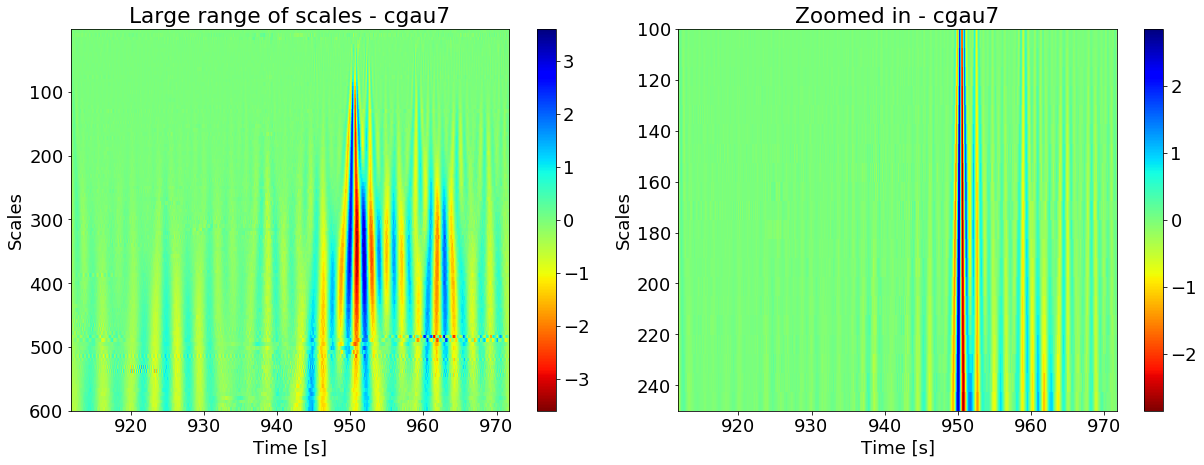

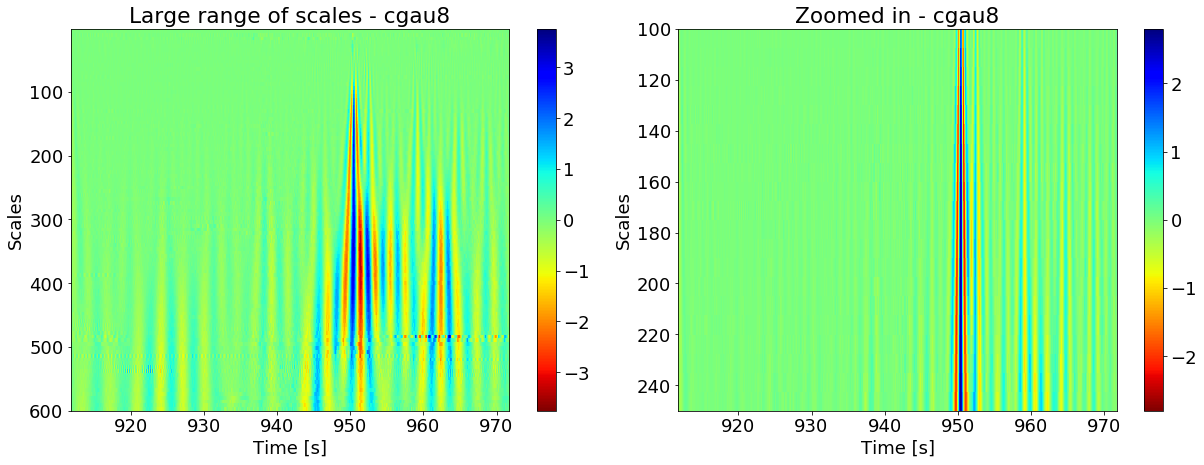

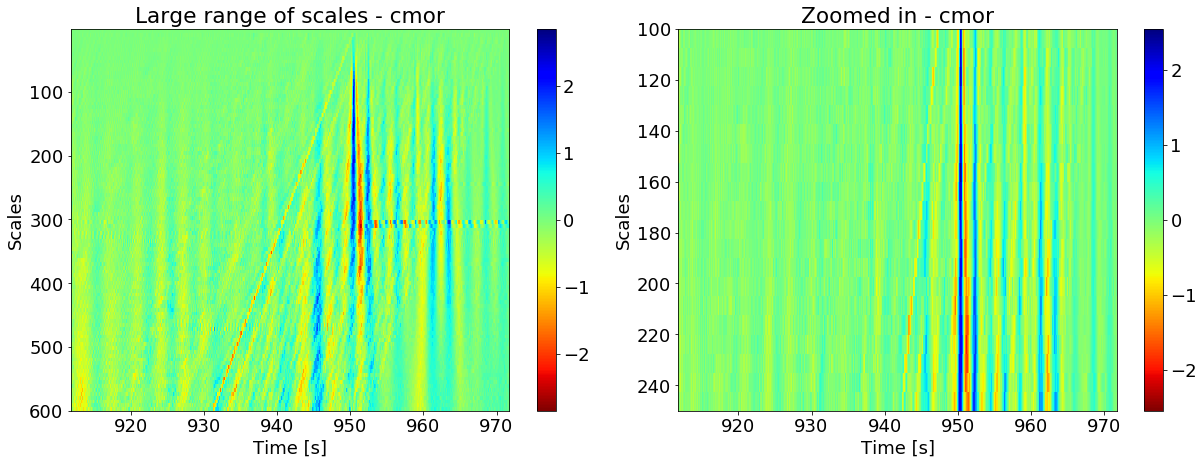

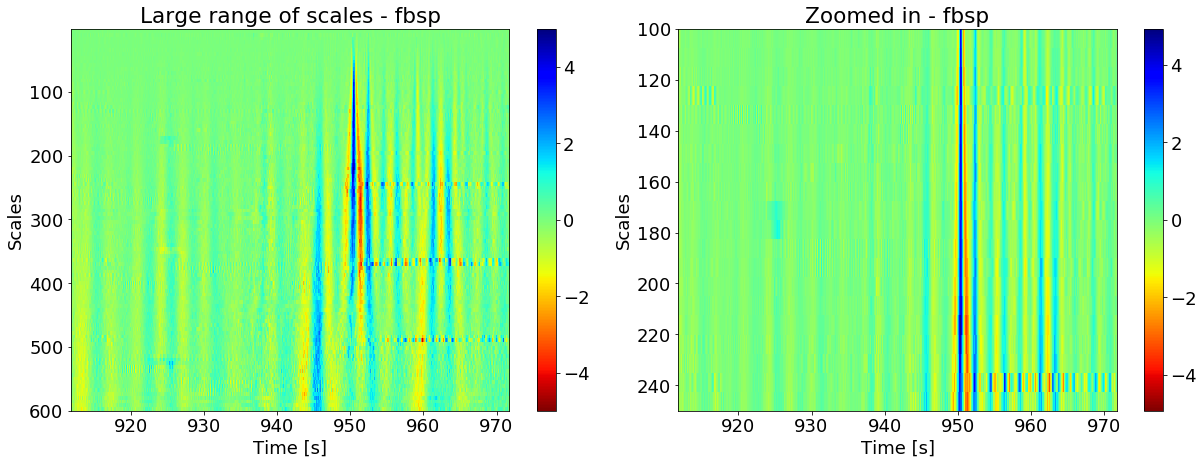

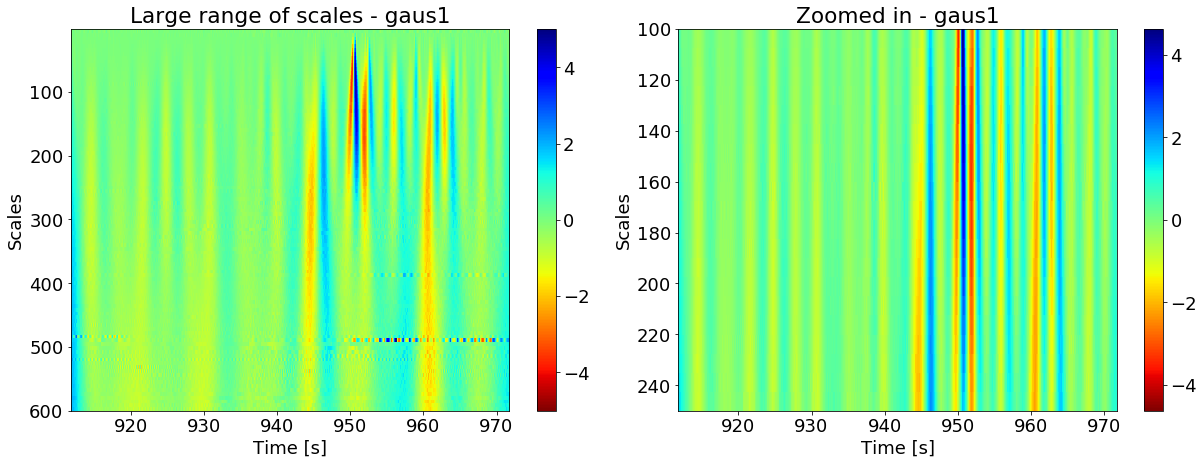

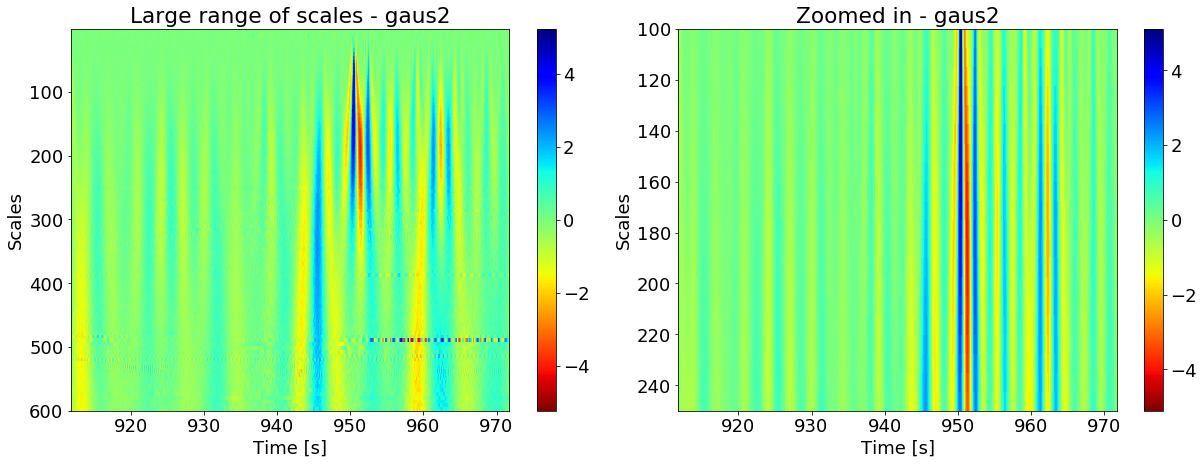

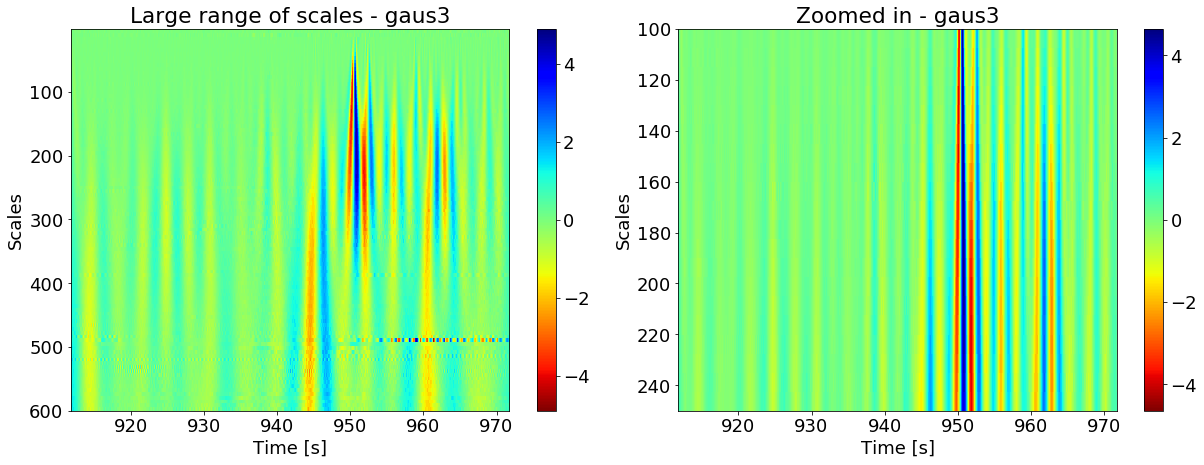

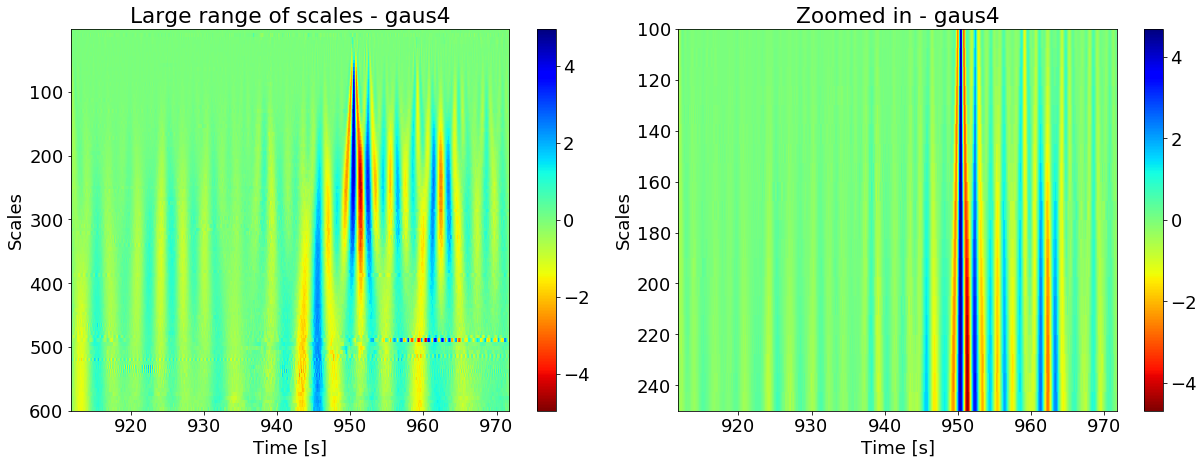

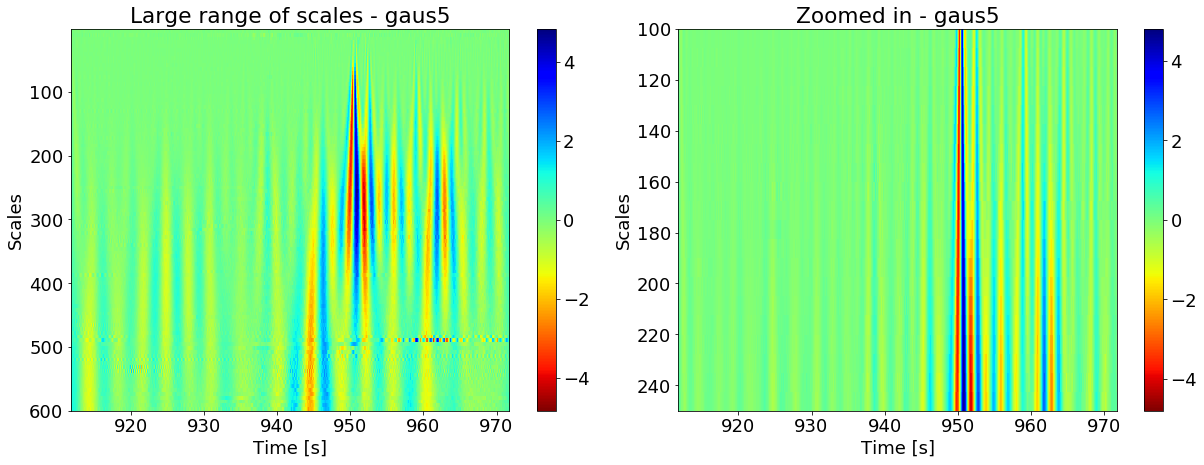

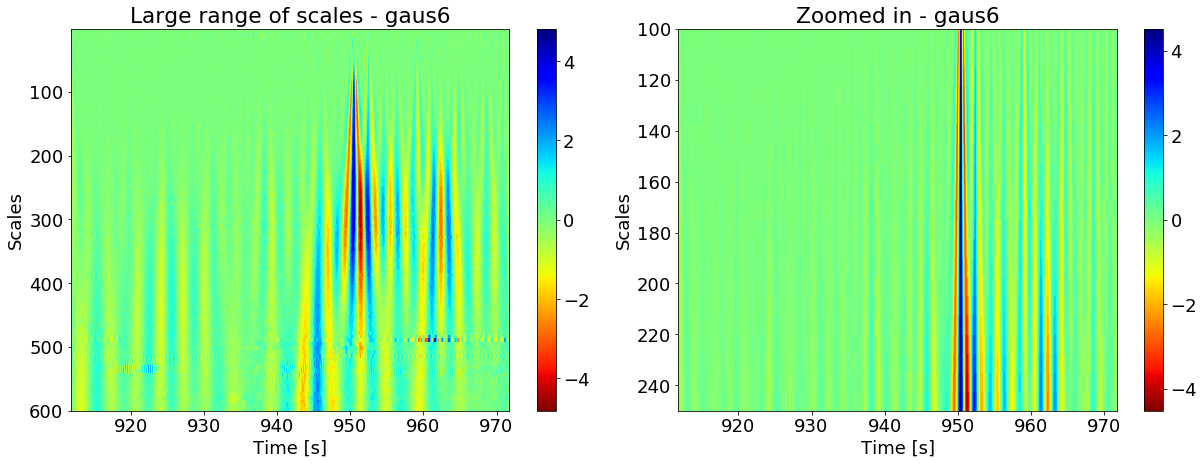

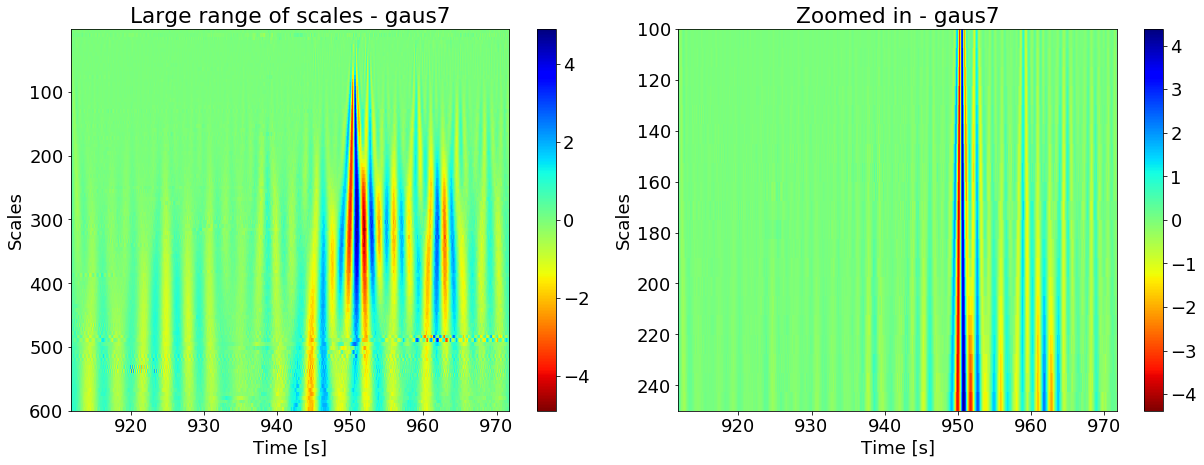

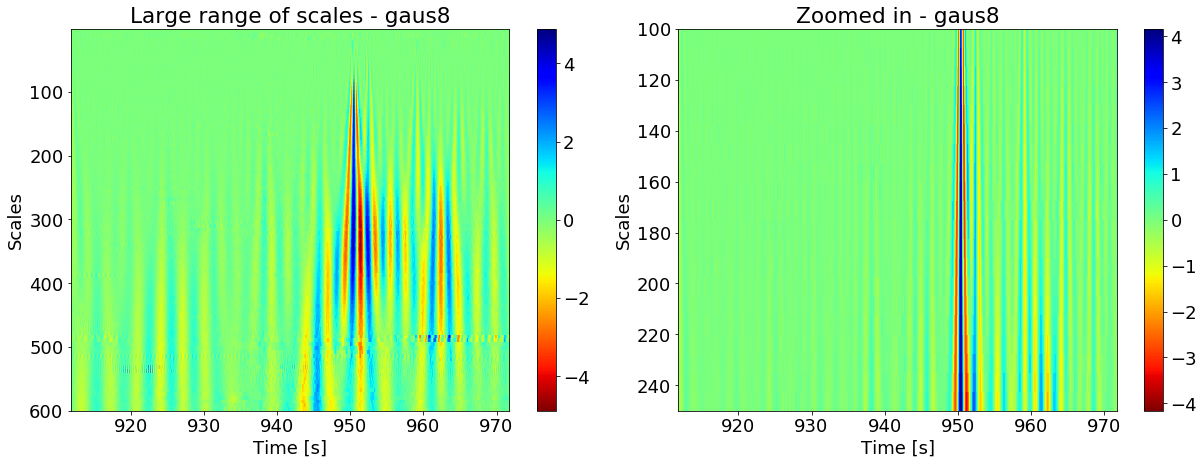

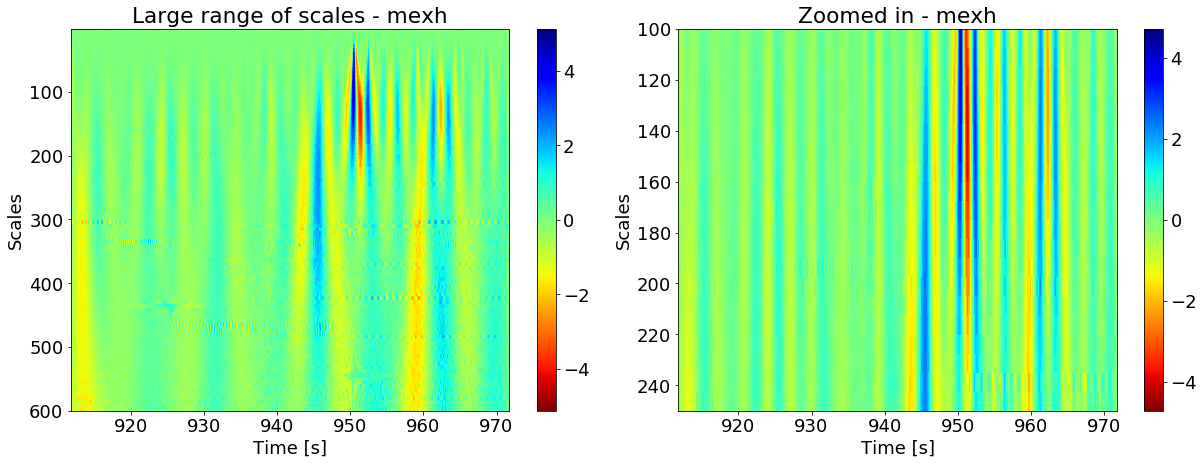

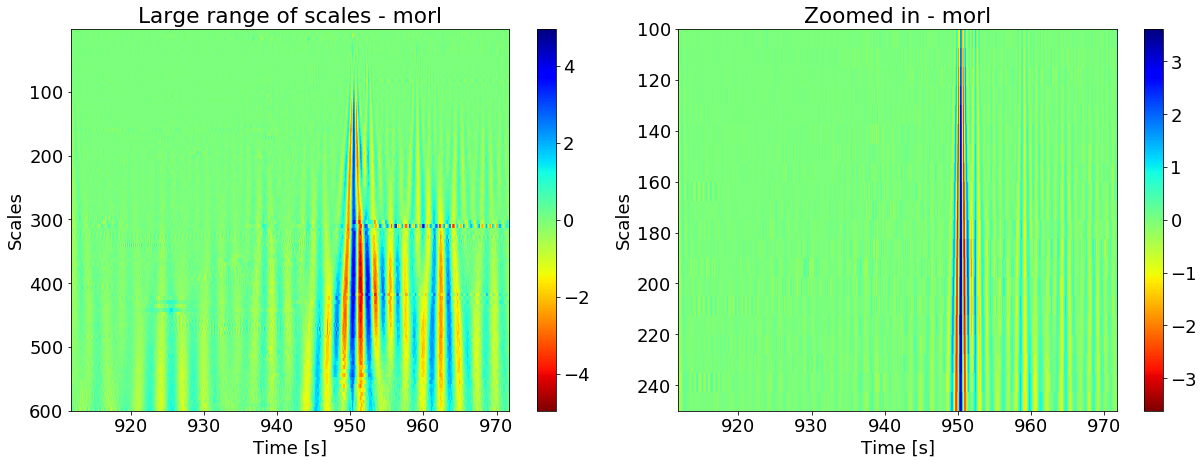

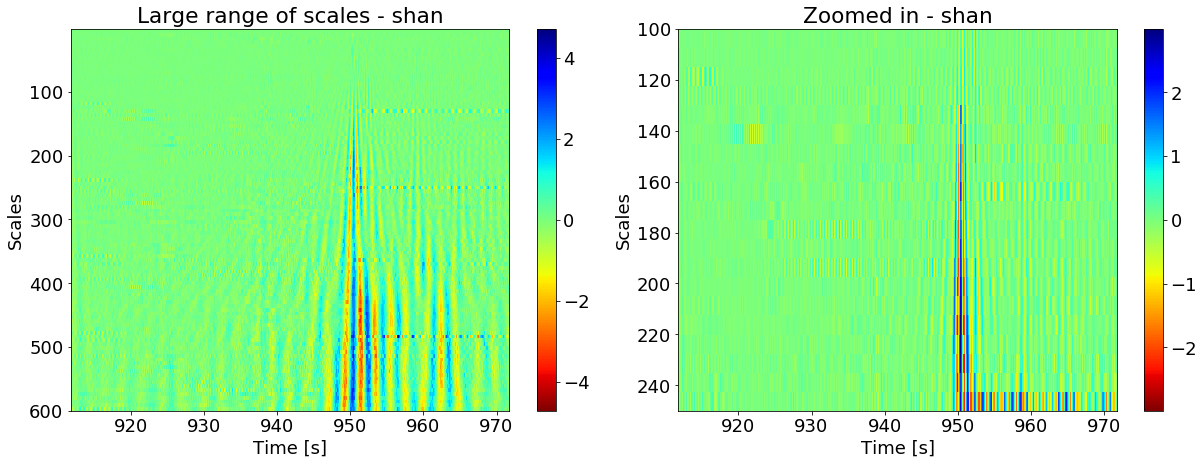

In [9]:
## CWT
scales_1 = np.linspace(1, 600, 100)
scales_2 = np.linspace(100, 250, 20)
#scales = [7, 8, 9, 10, 12]
waveletname = 'mexh'
scales_to_freq = [100,250]
freqs = pywt.scale2frequency(waveletname, scales_to_freq) / dt
#print(pywt.wavelist(kind='continuous'))

print(f"Scale to frequency conversion: {scales_to_freq} -> {freqs} Hz")

wavelet_list = ['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 
               'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 
               'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 
               'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']

for waveletname in wavelet_list:

    fig,axs = plt.subplots(1,2,figsize=(17, 6))
    fig.tight_layout(pad=0.5)

    plt.sca(axs[0])
    cwtmatr, freqs = pywt.cwt(signalx[N-start_idx:N], scales_1, waveletname)
    plt.imshow(cwtmatr.real, extent=[t[N-start_idx], t[N-1], scales_1[-1], scales_1[0]], cmap='jet_r', aspect='auto',
               vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) 
    plt.title(f"Large range of scales - {waveletname}")
    plt.ylabel('Scales')
    plt.xlabel('Time [s]')
    plt.colorbar()

    plt.sca(axs[1])
    cwtmatr, freqs = pywt.cwt(signalx[N-start_idx:N], scales_2, waveletname)
    plt.imshow(cwtmatr.real, extent=[t[N-start_idx], t[N-1], scales_2[-1], scales_2[0]], cmap='jet_r', aspect='auto',
               vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) 
    plt.title(f"Zoomed in - {waveletname}")
    plt.ylabel('Scales')
    plt.xlabel('Time [s]')
    plt.colorbar()
    plt.show()